## We will do a EDA on the given movies data set and will make a movie recommender system using the KNN supervised machine learning  

# Problem statement

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>

In [7]:
# Data Exploration

# Import packages
import pandas as pd
import numpy as np

In [8]:
## Loading the Data

In [9]:
pwd

'C:\\Users\\Deepu\\Downloads'

In [10]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [11]:
imdb_df = pd.read_csv('imdb_data.csv')

# 1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.

Profit = Revenue - Budget

Max(Profit)

In [13]:
imdb_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [14]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [15]:
# Create a column called profit
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']

In [16]:
# Create a column called profit
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']

# Create a column callled ROI
imdb_df['roi'] = 100 * imdb_df['profit']/imdb_df['budget']

In [17]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit,roi
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,-12.038207
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,137.873588
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,296.727273
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,1233.333333
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,3923970,inf


In [18]:
# Find max profit
max_profit = imdb_df.profit.max()
max_profit

1316249360

In [19]:
# Find movie with max profit
max_profit_movie = imdb_df[imdb_df.profit == imdb_df.profit.max()]
max_profit_movie

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit,roi
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,1316249360,692.762821


In [20]:
print(max_profit_movie.iloc[0].crew)

[{'credit_id': '52fe4cc8c3a36847f823e681', 'department': 'Production', 'gender': 2, 'id': 12835, 'job': 'Producer', 'name': 'Vin Diesel', 'profile_path': '/7rwSXluNWZAluYMOEWBxkPmckES.jpg'}, {'credit_id': '52fe4cc8c3a36847f823e687', 'department': 'Production', 'gender': 2, 'id': 11874, 'job': 'Producer', 'name': 'Neal H. Moritz', 'profile_path': '/cNcsEYmoS4niCz3UkVAA09dUIob.jpg'}, {'credit_id': '52fe4cc8c3a36847f823e68d', 'department': 'Writing', 'gender': 2, 'id': 58191, 'job': 'Writer', 'name': 'Chris Morgan', 'profile_path': '/dUGxIwFBLrSFLImxjeda1krndMO.jpg'}, {'credit_id': '52fe4cc8c3a36847f823e693', 'department': 'Writing', 'gender': 0, 'id': 8162, 'job': 'Characters', 'name': 'Gary Scott Thompson', 'profile_path': '/e2dMfqFvRsOXgWZ1VToYLmos17y.jpg'}, {'credit_id': '52fe4cc8c3a36847f823e699', 'department': 'Directing', 'gender': 2, 'id': 2127, 'job': 'Director', 'name': 'James Wan', 'profile_path': '/d1LSKfzi5J6QngWS7niN1zPJdud.jpg'}, {'credit_id': '52fe4cc8c3a36847f823e6a7', 'd

In [21]:
# Convert string to list of dictionaries
crew_details = eval(max_profit_movie.iloc[0].crew)
# Names of directors
director_names = ''
for crew_member in crew_details:
  if crew_member['job'] == 'Director':
    director_names += crew_member['name'] + ' | '
print('Director List: ' + director_names)

# Names of Producers
producer_names = ''
for crew_member in crew_details:
  if crew_member['job'] == 'Producer':
    producer_names += crew_member['name'] + ' | '
print('Producer List: ' + producer_names)

Director List: James Wan | 
Producer List: Vin Diesel | Neal H. Moritz | Michael Fottrell | Brandon Birtell | 


In [22]:
# Actors of the Movie
# Convert string to list of dictionaries
cast_details = eval(max_profit_movie.iloc[0].cast)
# Gettting all names for the cast of the movie
cast_names = ''
for cast_member in cast_details:
  cast_names += cast_member['name'] + ' | '
print('Cast Members: ' + cast_names)

Cast Members: Vin Diesel | Paul Walker | Dwayne Johnson | Michelle Rodriguez | Tyrese Gibson | Ludacris | Jordana Brewster | Djimon Hounsou | Tony Jaa | Ronda Rousey | Nathalie Emmanuel | Kurt Russell | Jason Statham | Sung Kang | Gal Gadot | Lucas Black | Elsa Pataky | Noel Gugliemi | John Brotherton | Luke Evans | Ali Fazal | Miller Kimsey | Charlie Kimsey | Eden Estrella | Gentry White | Iggy Azalea | Jon Lee Brody | Levy Tran | Anna Colwell | Viktor Hernandez | Steve Coulter | Robert Pralgo | Antwan Mills | J.J. Phillips | Jorge Ferragut | Sara Sohn | Benjamin Blankenship | D.J. Hapa | T-Pain | Brian Mahoney | Brittney Alger | Romeo Santos | Jocelin Donahue | Stephanie Langston | Jorge-Luis Pallo | Tego Calder√≥n | Nathalie Kelley | Shad Moss | Don Omar | Klement Tinaj | Caleb Walker | Cody Walker | 


# 2. This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?

In [23]:
# We need to look at only two columns
relevant_df = imdb_df[['original_language', 'roi']]
relevant_df

,original_language,roi
0,en,-12.038207
1,en,137.873588
2,en,296.727273
3,hi,1233.333333
4,ko,inf
...,...,...
2995,en,inf
2996,sv,inf
2997,en,37.625786
2998,en,309.436633


In [24]:
# Dropping rows with infinite roi
relevant_df = relevant_df[~(relevant_df.roi == np.inf)]
relevant_df

,original_language,roi
0,en,-12.038207
1,en,137.873588
2,en,296.727273
3,hi,1233.333333
5,en,-59.229525
...,...,...
2992,en,6.888190
2993,en,265.695425
2997,en,37.625786
2998,en,309.436633


In [25]:
# movie languages and their average ROI
relevant_df.groupby('original_language').roi.mean().reset_index().sort_values('roi', ascending = False)

,original_language,roi
15,ko,3.817941e+07
4,en,5.439874e+05
3,el,5.198013e+03
29,tr,9.660000e+02
9,he,4.562924e+02
28,te,4.400768e+02
2,de,4.349067e+02
32,zh,4.084563e+02
6,fa,4.000000e+02
21,pl,3.958170e+02


# 3. Find out the unique genres of movies in this dataset.

In [26]:
imdb_df.genres.iloc[1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [27]:
# genres_list
genres_list = []
# iterating over all rows of the column 'genres'
for index, value in enumerate(imdb_df.genres):
  # filtering out nans
  if type(value) == str:
    # converting str to list of dict
    values = eval(value)
    # iterate over all genres in one row
    for genre_entry in values:
      genres_list.append(genre_entry['name'])
# Final list of genres
set(genres_list)

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

# 4. Make a table of all the producers and directors of each movie.

# Find the top 3 producers who have produced movies with the highest average RoI?

In [28]:
relevant_df = imdb_df[['crew','cast','title','roi']].copy()
relevant_df

def producer(crew_json):
  if type(crew_json) == str:
    crew_details = eval(crew_json)
    producer_names = ''
    for crew_member in crew_details:
      if crew_member['job'] == 'Producer':
        producer_names += crew_member['name'] + ' | '
    return producer_names
  return None

def director(crew_json):
  if type(crew_json) == str:
    crew_details = eval(crew_json)
    director_names = ''
    for crew_member in crew_details:
      if crew_member['job'] == 'Director':
        director_names += crew_member['name'] + ' | '
    return director_names
  return None

# List of movies with Producers and Directors
relevant_df['producers'] = relevant_df.crew.map(lambda x: producer(x))
relevant_df['directors'] = relevant_df.crew.map(lambda x: director(x))
relevant_df

# movie director producer df
movie_p_d_df = relevant_df.copy()

In [29]:
# Dropping inf ROI rows
relevant_df = relevant_df[~(relevant_df.roi == np.inf)]

In [30]:
# Producers with highest average ROIs
relevant_df.groupby('producers').roi.mean().reset_index().sort_values('roi', ascending = False)

,producers,roi
705,Jang Jin | Ji Sang-yong | Lee Eun-ha |,4.197476e+08
284,Charlie Chaplin |,2.833338e+08
971,Marc Bienstock |,9.999990e+07
742,Jerry Weintraub |,3.395405e+07
711,Jason Blum | Oren Peli | Amir Zbeda |,1.288939e+06
...,...,...
803,John Penney |,-9.999850e+01
418,Diana Phillips | Laurence Malkin | Share Stall...,-9.999949e+01
897,Laurie Parker | Nicole Kidman |,-9.999981e+01
1449,Shakim Compere | Otis Best |,-9.999993e+01


In [31]:
# Directors with highest average ROIs
top_3_dir = relevant_df.groupby('directors').roi.mean().reset_index().sort_values('roi', ascending = False).head(3)
top_3_dir

,directors,roi
947,Park Kwang-hyun |,419747562.5
193,Charlie Chaplin |,283333750.0
332,Douglas Aarniokoski |,99999900.0


# 5. Which actor has acted in the most number of movies?

In [32]:
relevant_df = imdb_df[['cast','title']].copy()
relevant_df

def actor(cast_json):
  if type(cast_json) == str:
    actors_list = []
    cast_val = eval(cast_json)
    for cast in cast_val:
      actors_list.append(cast['name'])
    return actors_list
  return None

relevant_df['actors'] = relevant_df.cast.map(lambda x: actor(x))
relevant_df

,cast,title,actors
0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",Hot Tub Time Machine 2,"[Rob Corddry, Craig Robinson, Clark Duke, Adam..."
1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",The Princess Diaries 2: Royal Engagement,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond..."
2,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",Whiplash,"[Miles Teller, J.K. Simmons, Melissa Benoist, ..."
3,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",Kahaani,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ..."
4,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",Marine Boy,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim..."
...,...,...,...
2995,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...",Chasers,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠..."
2996,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...",We Are the Best!,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da..."
2997,"[{'cast_id': 10, 'character': 'Samantha Caine ...",The Long Kiss Goodnight,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ..."
2998,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...",Along Came Polly,"[Ben Stiller, Jennifer Aniston, Philip Seymour..."


In [33]:
# List of all actors starred
actors_master_list = []
for i in range(len(relevant_df.actors)):
  if type(relevant_df.actors.iloc[i]) == list:
    actors_master_list += relevant_df.actors.iloc[i]

In [34]:
pd.Series(actors_master_list).value_counts()

Robert De Niro       30
Samuel L. Jackson    30
Morgan Freeman       27
Bruce Willis         25
J.K. Simmons         25
                     ..
Chris Potter          1
Akin Gazi             1
Lotfi Dziri           1
Vik Sahay             1
Derek Burnell         1
Length: 38588, dtype: int64

# 6. Top 3 directors prefer which actors the most?

In [35]:
# Find Top 3 Directors based on ROI
top_3_dir

,directors,roi
947,Park Kwang-hyun |,419747562.5
193,Charlie Chaplin |,283333750.0
332,Douglas Aarniokoski |,99999900.0


In [36]:
# Movie Director Producer List
top_movies = movie_p_d_df[(movie_p_d_df.directors == 'Park Kwang-hyun | ') | (movie_p_d_df.directors == 'Charlie Chaplin | ') | (movie_p_d_df.directors == 'Douglas Aarniokoski | ')]
top_movies['actors'] = top_movies.cast.map(lambda x: actor(x))
top_movies

C:\Users\Deepu\AppData\Local\Temp\ipykernel_5540\1054468333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies['actors'] = top_movies.cast.map(lambda x: actor(x))


,crew,cast,title,roi,producers,directors,actors
796,"[{'credit_id': '57d001179251416de50020a7', 'de...","[{'cast_id': 5, 'character': 'Chief Comrade Le...",Welcome to Dongmakgol,419747562.5,Jang Jin | Ji Sang-yong | Lee Eun-ha |,Park Kwang-hyun |,"[Jung Jae-young, Seo Jae-kyeong, Ryu Deok-hwan..."
849,"[{'credit_id': '5621aeadc3a3680e1d00a09a', 'de...","[{'cast_id': 8, 'character': 'A factory worker...",Modern Times,849999900.0,Charlie Chaplin |,Charlie Chaplin |,"[Charlie Chaplin, Paulette Goddard, Henry Berg..."
1763,"[{'credit_id': '52fe43269251416c75005605', 'de...","[{'cast_id': 10, 'character': 'A Tramp', 'cred...",The Kid,900.0,Charlie Chaplin |,Charlie Chaplin |,"[Charlie Chaplin, Jackie Coogan, Edna Purvianc..."
2652,"[{'credit_id': '52fe428cc3a36847f8027429', 'de...","[{'cast_id': 13, 'character': 'Hynkel - Dictat...",The Great Dictator,450.0,Charlie Chaplin |,Charlie Chaplin |,"[Charlie Chaplin, Jack Oakie, Reginald Gardine..."
2695,"[{'credit_id': '52fe499cc3a368484e1346b1', 'de...","[{'cast_id': 5, 'character': 'Abby Russell', '...",Nurse 3-D,99999900.0,Marc Bienstock |,Douglas Aarniokoski |,"[Paz de la Huerta, Katrina Bowden, Kathleen Tu..."


In [37]:
# List of all actors starred
actors_master_list = []
for i in range(len(top_movies.actors)):
  if type(top_movies.actors.iloc[i]) == list:
    actors_master_list += top_movies.actors.iloc[i]

pd.Series(actors_master_list).value_counts()

Charlie Chaplin     3
Chester Conklin     2
Harry Wilson        2
Paulette Goddard    2
Henry Bergman       2
                   ..
Beulah Bains        1
Albert Austin       1
Edna Purviance      1
Jackie Coogan       1
Martin Donovan      1
Length: 141, dtype: int64

# Let's make a recommender system using the KNN machine learning algroithms 

In [38]:
imdb_df.shape

imdb_df.dropna(inplace = True)

imdb_df.shape

(203, 25)

In [1]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [2]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [3]:
import pandas as pd
import numpy as np

In [401]:
imdb_df = pd.read_csv('imdb_data.csv')

In [341]:
imdb_df.dropna(inplace = True)

In [402]:
imdb_df.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [403]:
imdb_df.genres

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

In [404]:
for i in eval(imdb_df.genres[22]):
    print(i['name'])

Thriller
Horror


In [405]:
imdb_df.genres.isnull().sum()

7

In [406]:
imdb_df[imdb_df.genres == np.nan]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [407]:
imdb_df[imdb_df.genres == " "]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [408]:
np.nan in imdb_df.genres.tolist()

True

In [409]:
count = 0
for i in imdb_df.genres.tolist():
    count += 1
print(count)    

3000


In [410]:
imdb_df[imdb_df.genres == np.NaN]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue


In [411]:
imdb_df.genres.tolist()[470:473]

[nan,
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]"]

In [412]:
imdb_df.genres.tolist()[470]

nan

In [413]:
imdb_df.genres.tolist()[471]

"[{'id': 35, 'name': 'Comedy'}]"

In [414]:
imdb_df[470:475]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
470,471,NaN,2000000,NaN,NaN,tt0349159,en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.079856,...,9/12/03,120.0,NaN,Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",NaN,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",NaN,1672730
471,472,"[{'id': 86119, 'name': 'The Hangover Collectio...",35000000,"[{'id': 35, 'name': 'Comedy'}]",http://hangoverpart2.warnerbros.com/dvd/,tt1119646,en,The Hangover,When three friends finally come to after a rau...,23.947351,...,6/5/09,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some guys just can't handle Vegas.,The Hangover,"[{'id': 3508, 'name': 'underwear'}, {'id': 480...","[{'cast_id': 1, 'character': 'Phil Wenneck', '...","[{'credit_id': '52fe479a9251416c7509f653', 'de...",459270619
472,473,NaN,19000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,tt0102945,en,Sleeping with the Enemy,A young woman fakes her own death in an attemp...,8.560694,...,2/8/91,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Self-Defense is not murder,Sleeping with the Enemy,"[{'id': 2320, 'name': 'violent husband'}, {'id...","[{'cast_id': 1, 'character': 'Laura Burney / S...","[{'credit_id': '57fd3c0d92514124a100160e', 'de...",174999005
473,474,NaN,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0252223,en,All The Queen's Men,A mismatched team of British Special Services ...,1.652275,...,10/14/01,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,All The Queen's Men,"[{'id': 108, 'name': 'transvestism'}, {'id': 1...","[{'cast_id': 2, 'character': ""O'Rourke"", 'cred...","[{'credit_id': '52fe44959251416c91015db9', 'de...",23000
474,475,"[{'id': 265865, 'name': 'Space Dogs', 'poster_...",25000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,tt1272051,ru,Белка и Стрелка. Звёздные собаки,"Belka, the amazing flying dog is unexpectedly ...",4.037707,...,3/18/10,85.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Space Dogs,"[{'id': 2139, 'name': 'russia'}, {'id': 4040, ...","[{'cast_id': 6, 'character': 'Belka (voice)', ...","[{'credit_id': '52fe46039251416c91046147', 'de...",6500000


In [415]:
imdb_df[imdb_df.runtime == 100]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
63,64,"[{'id': 9735, 'name': 'Friday the 13th Collect...",5000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,tt0097388,en,Friday the 13th Part VIII: Jason Takes Manhattan,"The Big Apple's in big trouble, as indestructi...",7.743144,...,7/28/89,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Big Apple's in BIG trouble!,Friday the 13th Part VIII: Jason Takes Manhattan,"[{'id': 242, 'name': 'new york'}, {'id': 1422,...","[{'cast_id': 4, 'character': 'Jason', 'credit_...","[{'credit_id': '52fe43529251416c7500bf03', 'de...",14000000
117,118,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://video.movies.go.com/wildhogs/,tt0486946,en,Wild Hogs,"Restless and ready for adventure, four suburba...",11.356011,...,3/2/07,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can happen on the road to nowhere.,Wild Hogs,"[{'id': 1599, 'name': 'midlife crisis'}, {'id'...","[{'cast_id': 1, 'character': 'Doug Madsen', 'c...","[{'credit_id': '52fe440e9251416c750276bb', 'de...",253625427
128,129,NaN,18000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.sonypictures.com/homevideo/thefog/i...,tt0432291,en,The Fog,"Trapped within an eerie mist, the residents of...",9.929809,...,10/14/05,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Their PAST Has Come Back To HAUNT THEM,The Fog,"[{'id': 530, 'name': 'prophecy'}, {'id': 657, ...","[{'cast_id': 19, 'character': 'Nick Castle', '...","[{'credit_id': '52fe4277c3a36847f8020c2f', 'de...",46201432
134,135,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.runfatboyrunmovie.com/,tt0425413,en,Run Fatboy Run,Five years after jilting his pregnant fiancée ...,11.840495,...,9/6/07,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Commitment. Responsibility. There's noth...,"Run, Fatboy, Run","[{'id': 494, 'name': 'father son relationship'...","[{'cast_id': 9, 'character': 'Dennis', 'credit...","[{'credit_id': '52fe4489c3a36847f809b997', 'de...",33000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,2795,NaN,8500000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",http://www.duffmovie.com/,tt1666801,en,The DUFF,Bianca's universe turns upside down when she l...,8.592449,...,2/20/15,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"You either know one, you have one, or you are ...",The DUFF,"[{'id': 6270, 'name': 'high school'}, {'id': 1...","[{'cast_id': 2, 'character': 'Bianca Piper', '...","[{'credit_id': '53875d26c3a3681add0031ec', 'de...",43528634
2806,2807,NaN,35000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://disney.go.com/disneypictures/skyhigh/,tt0405325,en,Sky High,Set in a world where superheroes are commonly ...,8.061423,...,7/29/05,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Saving The World... One Homework Assignment At...,Sky High,"[{'id': 1701, 'name': 'hero'}, {'id': 1797, 'n...","[{'cast_id': 1, 'character': 'Will Stronghold'...","[{'credit_id': '52fe44449251416c7502eb07', 'de...",86369815
2900,2901,NaN,200000,NaN,http://ritaslastfairytale.ru/,tt1766044,en,Poslednyaya skazka Rity,The film speaks about universal themes of love...,0.560685,...,11/1/12,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Rel

In [416]:
def gen_list(cell):
    
    listy = [] # creating a empty list to store varaibles 
    cell = str(cell) # converting it to string as lambda is not taking it as strin this is done as per error thrown at us
    if cell != 'nan':# checking if there is nan value or not
        for elem in eval(cell): # iterating and coverting all the string datatype into the datatype i.e '[]' to []
            listy.append(elem['name']) # getting all the genres from the list of dictionary and store them into listy
    else:# if it is a null then pass
        return np.nan
    
    return listy

In [417]:
imdb_df['genres'].apply(lambda x: gen_list(x))

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres, Length: 3000, dtype: object

In [418]:
imdb_df['genres_list'] = imdb_df['genres'].apply(lambda x: gen_list(x))

In [419]:
imdb_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genres_list
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Comedy]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Comedy, Drama, Family, Romance]"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Drama]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Thriller, Drama]"
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Action, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,"[Comedy, Romance]"
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,"[Drama, Music]"
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,"[Crime, Action, My

In [420]:
df = imdb_df[['id','popularity','title','genres_list']]

In [421]:
df

,id,popularity,title,genres_list
0,1,6.575393,Hot Tub Time Machine 2,[Comedy]
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]"
2,3,64.299990,Whiplash,[Drama]
3,4,3.174936,Kahaani,"[Thriller, Drama]"
4,5,1.148070,Marine Boy,"[Action, Thriller]"
...,...,...,...,...
2995,2996,9.853270,Chasers,"[Comedy, Romance]"
2996,2997,3.727996,We Are the Best!,"[Drama, Music]"
2997,2998,14.482345,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,2999,15.725542,Along Came Polly,"[Comedy, Romance]"


In [422]:
df.genres_list

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres_list, Length: 3000, dtype: object

In [423]:
# basically we are running a nest loop set comprehension the - structure (output_after_child_loop is parent loop child loop)
set(j for i in df.genres_list for j in i)

TypeError: 'float' object is not iterable

In [424]:
# conversely we can do 
df.genres_list.explode(',').unique()

array(['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action',
       'Animation', 'Adventure', 'Horror', 'Documentary', 'Music',
       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War',
       'Western', 'History', nan, 'TV Movie'], dtype=object)

In [425]:
df

,id,popularity,title,genres_list
0,1,6.575393,Hot Tub Time Machine 2,[Comedy]
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]"
2,3,64.299990,Whiplash,[Drama]
3,4,3.174936,Kahaani,"[Thriller, Drama]"
4,5,1.148070,Marine Boy,"[Action, Thriller]"
...,...,...,...,...
2995,2996,9.853270,Chasers,"[Comedy, Romance]"
2996,2997,3.727996,We Are the Best!,"[Drama, Music]"
2997,2998,14.482345,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,2999,15.725542,Along Came Polly,"[Comedy, Romance]"


In [426]:
df[470:]

,id,popularity,title,genres_list
470,471,0.079856,"The Book of Mormon Movie, Volume 1: The Journey",NaN
471,472,23.947351,The Hangover,[Comedy]
472,473,8.560694,Sleeping with the Enemy,"[Drama, Crime, Thriller]"
473,474,1.652275,All The Queen's Men,"[Action, Comedy, Drama, History]"
474,475,4.037707,Space Dogs,"[Family, Animation]"
...,...,...,...,...
2995,2996,9.853270,Chasers,"[Comedy, Romance]"
2996,2997,3.727996,We Are the Best!,"[Drama, Music]"
2997,2998,14.482345,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,2999,15.725542,Along Came Polly,"[Comedy, Romance]"


In [427]:
df = df.dropna()

In [428]:
df.shape

(2993, 4)

In [429]:
df

,id,popularity,title,genres_list
0,1,6.575393,Hot Tub Time Machine 2,[Comedy]
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]"
2,3,64.299990,Whiplash,[Drama]
3,4,3.174936,Kahaani,"[Thriller, Drama]"
4,5,1.148070,Marine Boy,"[Action, Thriller]"
...,...,...,...,...
2995,2996,9.853270,Chasers,"[Comedy, Romance]"
2996,2997,3.727996,We Are the Best!,"[Drama, Music]"
2997,2998,14.482345,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,2999,15.725542,Along Came Polly,"[Comedy, Romance]"


In [430]:
unique_genres = df.genres_list.explode(',').unique().tolist()

In [431]:
df

,id,popularity,title,genres_list
0,1,6.575393,Hot Tub Time Machine 2,[Comedy]
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]"
2,3,64.299990,Whiplash,[Drama]
3,4,3.174936,Kahaani,"[Thriller, Drama]"
4,5,1.148070,Marine Boy,"[Action, Thriller]"
...,...,...,...,...
2995,2996,9.853270,Chasers,"[Comedy, Romance]"
2996,2997,3.727996,We Are the Best!,"[Drama, Music]"
2997,2998,14.482345,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,2999,15.725542,Along Came Polly,"[Comedy, Romance]"


In [432]:
for i in unique_genres:
    df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_15856\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)
C:\Users\Deepu\AppData\Local\Temp\ipykernel_15856\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df['genres_list'].apply(lambda x: i in x).astype(int)
C:\Users\Deepu\AppData\Local\Temp\ipykernel_15856\511344901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [433]:
df.head()

,id,popularity,title,genres_list,Comedy,Drama,Family,Romance,Thriller,Action,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,6.575393,Hot Tub Time Machine 2,[Comedy],1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]",1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,64.299990,Whiplash,[Drama],0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.174936,Kahaani,"[Thriller, Drama]",0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1.148070,Marine Boy,"[Action, Thriller]",0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [434]:
# Let's the genre graph 

In [435]:
for i in df.columns[4:].tolist():
    print(i , df[i].sum())

Comedy 1028
Drama 1531
Family 260
Romance 571
Thriller 789
Action 741
Animation 141
Adventure 439
Horror 301
Documentary 87
Music 100
Crime 469
Science Fiction 290
Mystery 225
Foreign 31
Fantasy 232
War 100
Western 43
History 132
TV Movie 1


In [438]:
#let's make a graph
column_sum = df.drop(['id','popularity'],axis = 1).sum(numeric_only = True, axis = 0)

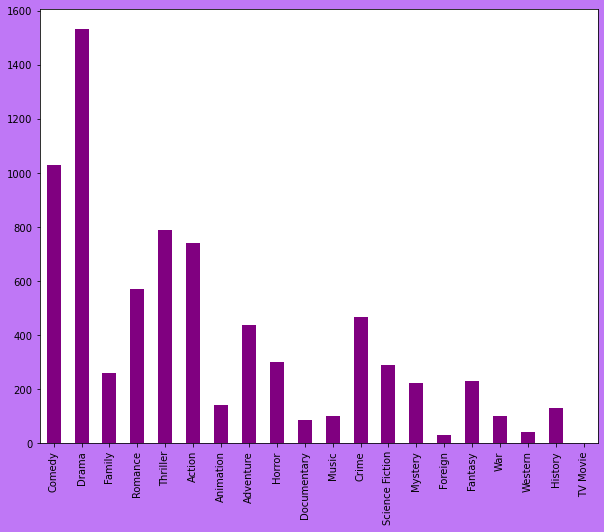

In [439]:
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8), edgecolor = 'k',facecolor = 'xkcd:light purple')
column_sum.plot(kind = 'bar', color = 'purple')
plt.show()

In [394]:
df.head()

,id,popularity,title,genres_list,Comedy,Drama,Family,Romance,Thriller,Action,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,6.575393,Hot Tub Time Machine 2,[Comedy],1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8.248895,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]",1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,64.299990,Whiplash,[Drama],0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.174936,Kahaani,"[Thriller, Drama]",0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1.148070,Marine Boy,"[Action, Thriller]",0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [440]:
df.drop(['id'],axis = 1,inplace = True)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_15856\1264036056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'],axis = 1,inplace = True)


In [441]:
df.drop(['genres_list'],axis = 1, inplace = True)

C:\Users\Deepu\AppData\Local\Temp\ipykernel_15856\849872212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['genres_list'],axis = 1, inplace = True)


In [442]:
df=df.sample(n = 1100, replace = False, random_state = 42)

In [443]:
df

,popularity,title,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
411,7.851669,Seabiscuit,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
773,0.001272,Live Nude Girls Unite!,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2434,3.967229,Results,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1.012665,The Last Flight of Noah's Ark,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
966,7.832484,Far from the Madding Crowd,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,1.014961,Little Miss Marker,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2332,7.032964,She's Funny That Way,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2178,6.372278,21 Grams,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2657,3.960622,Dick,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
X = df.set_index('title')

In [445]:
X

,popularity,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,...,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
title,,,,,,,,,,,,,,,,,,,,,
Seabiscuit,7.851669,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Live Nude Girls Unite!,0.001272,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Results,3.967229,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Last Flight of Noah's Ark,1.012665,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Far from the Madding Crowd,7.832484,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Little Miss Marker,1.014961,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
She's Funny That Way,7.032964,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21 Grams,6.372278,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [446]:
# Now we have a sparse matrix 
# A sparse matrix is a matrix in which most of its elements are zero

In [447]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(X.values)

In [450]:
print(movie_features_df_matrix)

  (0, 0)	7.851669
  (0, 2)	1.0
  (0, 19)	1.0
  (1, 0)	0.001272
  (1, 10)	1.0
  (2, 0)	3.967229
  (2, 1)	1.0
  (3, 0)	1.012665
  (3, 3)	1.0
  (3, 8)	1.0
  (4, 0)	7.832484
  (4, 2)	1.0
  (4, 4)	1.0
  (5, 0)	9.832342
  (5, 5)	1.0
  (5, 6)	1.0
  (5, 12)	1.0
  (6, 0)	3.750365
  (6, 2)	1.0
  (6, 5)	1.0
  (6, 13)	1.0
  (7, 0)	7.743144
  (7, 5)	1.0
  (7, 9)	1.0
  (8, 0)	3.374229
  :	:
  (1092, 0)	2.514638
  (1092, 2)	1.0
  (1092, 12)	1.0
  (1093, 0)	1.935006
  (1093, 2)	1.0
  (1093, 3)	1.0
  (1094, 0)	14.811958
  (1094, 5)	1.0
  (1094, 9)	1.0
  (1095, 0)	1.014961
  (1095, 1)	1.0
  (1095, 2)	1.0
  (1095, 3)	1.0
  (1095, 4)	1.0
  (1096, 0)	7.032964
  (1096, 1)	1.0
  (1097, 0)	6.372278
  (1097, 2)	1.0
  (1097, 5)	1.0
  (1097, 12)	1.0
  (1098, 0)	3.960622
  (1098, 1)	1.0
  (1099, 0)	3.492576
  (1099, 1)	1.0
  (1099, 4)	1.0


In [451]:
#let's fit the model
from sklearn.neighbors import NearestNeighbors

In [454]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [517]:
querry_index=np.random.choice(X.shape[0])
print(querry_index)

688


In [518]:
distances, indices = model_knn.kneighbors(np.array(X.iloc[querry_index,:].values).reshape(1, -1), n_neighbors = 6)
# This returns the distance and index of the movies

In [519]:
distances

array([[1.11022302e-16, 1.45032633e-07, 5.14579893e-06, 2.04317552e-05,
        1.00756297e-04, 1.60292441e-04]])

In [520]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(X.index[querry_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, X.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for La peggior settimana della mia vita:

1: Strange Wilderness, with distance of 1.4503263345844175e-07:
2: But I'm a Cheerleader, with distance of 5.145798927630452e-06:
3: Cedar Rapids, with distance of 2.0431755200944757e-05:
4: The Secret of My Success, with distance of 0.00010075629666883579:
5: Material Girls, with distance of 0.0001602924413967033:


In [521]:
for i in indices.flatten():
    if i == querry_index:
        print(f'The recommendation for movie : {X.index[querry_index]}')
    else:
        print(X.index[i])

The recommendation for movie : La peggior settimana della mia vita
Strange Wilderness
But I'm a Cheerleader
Cedar Rapids
The Secret of My Success
Material Girls


In [522]:
print('My name is {0},{1}' .format('deepu','kumar'))

My name is deepu,kumar


In [523]:
for i in range(len(distances.flatten())):
    if i == 0:
        print('The recommendation for the move:{}'.format(X.index[querry_index]))
        print('')
    else:
        print('{} {} with a distance of  {}'.format(i,X.index[indices.flatten()[i]],distances.flatten()[i]))

The recommendation for the move:La peggior settimana della mia vita

1 Strange Wilderness with a distance of  1.4503263345844175e-07
2 But I'm a Cheerleader with a distance of  5.145798927630452e-06
3 Cedar Rapids with a distance of  2.0431755200944757e-05
4 The Secret of My Success with a distance of  0.00010075629666883579
5 Material Girls with a distance of  0.0001602924413967033


In [524]:
# That was just a fancy way to write a print command 

In [502]:
querry_index

139

In [504]:
X.index[querry_index]

'The Awakening'